Изучение общей информации

Откроем файл с данными и изучим общую информацию

In [107]:
# Подключение датасета
import os
from google.colab import drive

In [108]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [109]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/pet-pr_py_kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/pet-pr_py_kaggle/Global YouTube Statistics.csv
/content/drive/MyDrive/pet-pr_py_kaggle/Документация анализа.gdoc
/content/drive/MyDrive/pet-pr_py_kaggle/Global YouTube Statistics 2023.ipynb


In [110]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# Считаем датасет
pd.set_option('display.max_columns', None)
data = pd.read_csv('/content/drive/MyDrive/pet-pr_py_kaggle/Global YouTube Statistics.csv', encoding="latin-1")

data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


Изучим датасет, уберем ненужное и переименуем столбцы

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [113]:
# переименуем колонки, чтобы было понятнее
# для этого выведим все названия колонок
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [114]:
data.rename(columns={
    'rank': 'Ранг',
    'Youtuber': 'Название YouTube-канала',
    'subscribers': 'Количество подписчиков',
    'video views': 'Общее количество просмотров',
    'category': 'Категория канала',
    'Title': 'Имя учетной записи',
    'uploads': 'Общее количество загруженных видеороликов',
    'Country': 'Страна',
    'Abbreviation': 'Аббревиатура страны',
    'channel_type': 'Тип канала',
    'video_views_rank': 'Ранг канала по общему кол-ву просмотров',
    'country_rank': 'Ранг канала по кол-ву подписчиков в стране',
    'channel_type_rank': 'Ранг канала по его типу',
    'video_views_for_the_last_30_days': 'Общее кол-во просмотров за 30 дней',
    'lowest_monthly_earnings': 'Наименьший предполагаемый месячный доход',
    'highest_monthly_earnings': 'Наибольший предполагаемый месячный доход',
    'lowest_yearly_earnings': 'Наименьший предполагаемый годовой доход',
    'highest_yearly_earnings': 'Наибольший предполагаемый годовой доход',
    'subscribers_for_last_30_days': 'Кол-во новых подписчиков, за 30 дней',
    'created_year': 'Год создания канала',
    'created_month': 'Месяц, когда был создан канал',
    'created_date': 'День создания канала',
    'Gross tertiary education enrollment (%)':
        'Процент населения в стране с высшим образованием',
    'Population': 'Общая численность населения страны',
    'Unemployment rate': 'Уровень безработицы в стране',
    'Urban_population': 'Процент населения, проживающего в городах',
    'Latitude': 'Широтная координата местоположения страны',
    'Longitude': 'Координата долготы местоположения страны'
}, inplace=True)

In [115]:
# Проверка изменения
data.columns

Index(['Ранг', 'Название YouTube-канала', 'Количество подписчиков',
       'Общее количество просмотров', 'Категория канала', 'Имя учетной записи',
       'Общее количество загруженных видеороликов', 'Страна',
       'Аббревиатура страны', 'Тип канала',
       'Ранг канала по общему кол-ву просмотров',
       'Ранг канала по кол-ву подписчиков в стране', 'Ранг канала по его типу',
       'Общее кол-во просмотров за 30 дней',
       'Наименьший предполагаемый месячный доход',
       'Наибольший предполагаемый месячный доход',
       'Наименьший предполагаемый годовой доход',
       'Наибольший предполагаемый годовой доход',
       'Кол-во новых подписчиков, за 30 дней', 'Год создания канала',
       'Месяц, когда был создан канал', 'День создания канала',
       'Процент населения в стране с высшим образованием',
       'Общая численность населения страны', 'Уровень безработицы в стране',
       'Процент населения, проживающего в городах',
       'Широтная координата местоположения стра

In [116]:
# проверим количество пропусков
data.isnull().sum()

Ранг                                                  0
Название YouTube-канала                               0
Количество подписчиков                                0
Общее количество просмотров                           0
Категория канала                                     46
Имя учетной записи                                    0
Общее количество загруженных видеороликов             0
Страна                                              122
Аббревиатура страны                                 122
Тип канала                                           30
Ранг канала по общему кол-ву просмотров               1
Ранг канала по кол-ву подписчиков в стране          116
Ранг канала по его типу                              33
Общее кол-во просмотров за 30 дней                   56
Наименьший предполагаемый месячный доход              0
Наибольший предполагаемый месячный доход              0
Наименьший предполагаемый годовой доход               0
Наибольший предполагаемый годовой доход         

In [117]:
# удалим столбци, которыt мне не понадобятся

to_drop = ['Ранг', 'Имя учетной записи', 'Аббревиатура страны',
           'Ранг канала по общему кол-ву просмотров',
           'Ранг канала по кол-ву подписчиков в стране',
           'Ранг канала по его типу',
           'Общее кол-во просмотров за 30 дней',
           'Кол-во новых подписчиков, за 30 дней',
           'Процент населения, проживающего в городах',
           'Широтная координата местоположения страны',
           'Координата долготы местоположения страны']

data.drop(to_drop, axis=1, inplace=True)

In [118]:
data.head()

,Название YouTube-канала,Количество подписчиков,Общее количество просмотров,Категория канала,Общее количество загруженных видеороликов,Страна,Тип канала,Наименьший предполагаемый месячный доход,Наибольший предполагаемый месячный доход,Наименьший предполагаемый годовой доход,Наибольший предполагаемый годовой доход,Год создания канала,"Месяц, когда был создан канал",День создания канала,Процент населения в стране с высшим образованием,Общая численность населения страны,Уровень безработицы в стране
0,T-Series,245000000,2.280000e+11,Music,20082,India,Music,564600.0,9000000.00,6800000.00,1.084000e+08,2006.0,Mar,13.0,28.1,1.366418e+09,5.36
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,0.0,0.05,0.04,5.800000e-01,2006.0,Mar,5.0,88.2,3.282395e+08,14.70
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,337000.0,5400000.00,4000000.00,6.470000e+07,2012.0,Feb,20.0,88.2,3.282395e+08,14.70
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,493800.0,7900000.00,5900000.00,9.480000e+07,2006.0,Sep,1.0,88.2,3.282395e+08,14.70
4,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,455900.0,7300000.00,5500000.00,8.750000e+07,2006.0,Sep,20.0,28.1,1.366418e+09,5.36


In [119]:
data.describe()

,Количество подписчиков,Общее количество просмотров,Общее количество загруженных видеороликов,Наименьший предполагаемый месячный доход,Наибольший предполагаемый месячный доход,Наименьший предполагаемый годовой доход,Наибольший предполагаемый годовой доход,Год создания канала,День создания канала,Процент населения в стране с высшим образованием,Общая численность населения страны,Уровень безработицы в стране
count,9.950000e+02,9.950000e+02,995.000000,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000
mean,2.298241e+07,1.103954e+10,9187.125628,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,2012.630303,15.746465,63.627752,4.303873e+08,9.279278
std,1.752611e+07,1.411084e+10,34151.352254,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,4.512503,8.777520,26.106893,4.727947e+08,4.888354
min,1.230000e+07,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000
25%,1.450000e+07,4.288145e+09,194.500000,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000
50%,1.770000e+07,7.760820e+09,729.000000,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2013.000000,16.000000,68.000000,3.282395e+08,9.365000
75%,2.460000e+07,1.355470e+10,2667.500000,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,2016.000000,23.000000,88.200000,3.282395e+08,14.700000
max,2.450000e+08,2.280000e+11,301308.000000,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,2022.000000,31.000000,113.100000,1.397715e+09,14.720000


<Figure size 640x480 with 0 Axes>

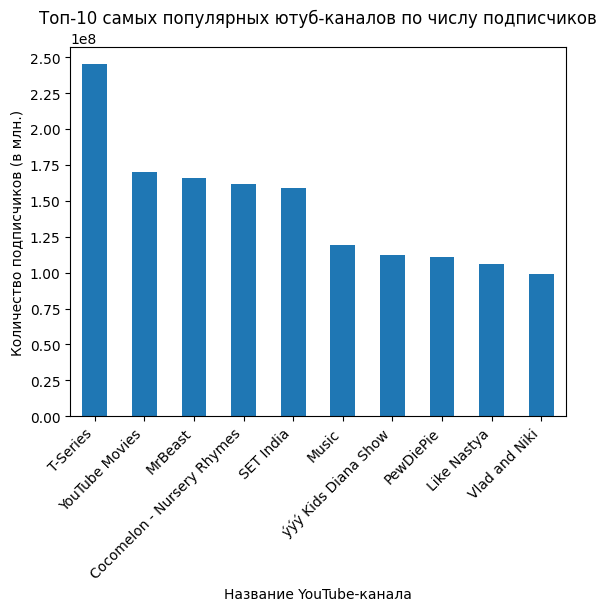

In [120]:
# Топ-10 самых популярных ютуб-каналов по числу подписчиков

top_10_subs = data.sort_values('Количество подписчиков',
                               ascending=False).iloc[:10, [0, 1]]

plt.figure()
top_10_subs.plot.bar(x='Название YouTube-канала', y='Количество подписчиков',
                     legend=False)

plt.title('Топ-10 самых популярных ютуб-каналов по числу подписчиков')
plt.xlabel('Название YouTube-канала', )
plt.ylabel('Количество подписчиков (в млн.)')
plt.xticks(rotation=45, ha='right')
plt.locator_params(axis='y', nbins= 12)

plt.show()

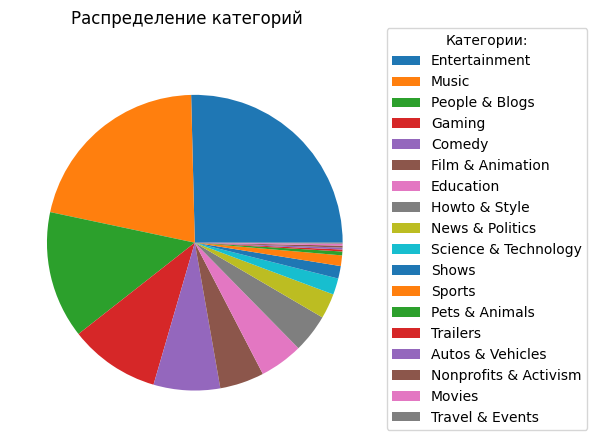

In [121]:
# Анализ категорий

category = data.groupby('Категория канала')['Название YouTube-канала'].count()
category.sort_values(ascending=False, inplace=True)
fig1, ax1 = plt.subplots()
ax1.pie(category.values)
fig1.suptitle('Распределение категорий')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.1), title = 'Категории:',
           labels=category.index)
fig1.show()

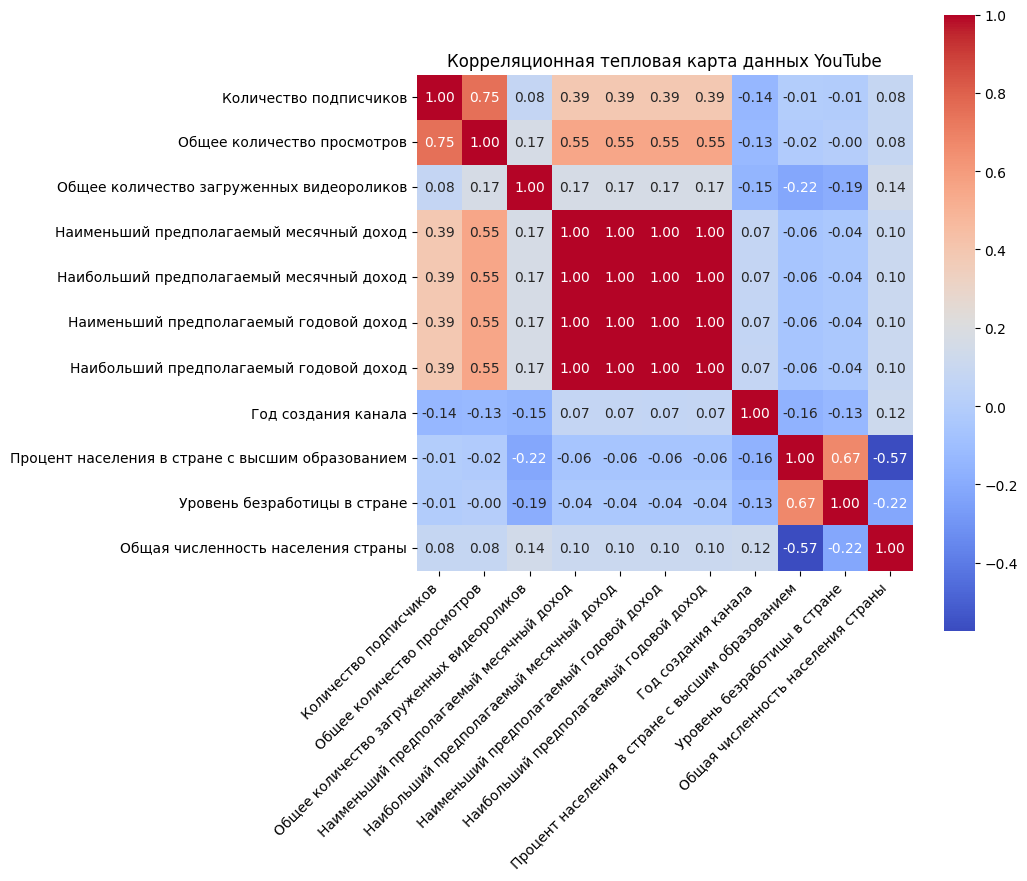

In [122]:
numerical_cols = ['Количество подписчиков', 'Общее количество просмотров',
                  'Общее количество загруженных видеороликов',
                  'Наименьший предполагаемый месячный доход',
                  'Наибольший предполагаемый месячный доход',
                  'Наименьший предполагаемый годовой доход',
                  'Наибольший предполагаемый годовой доход',
                  'Год создания канала',
                  'Процент населения в стране с высшим образованием',
                  'Уровень безработицы в стране',
                  'Общая численность населения страны']

data_corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(data_corr_matrix, annot=True, fmt=".2f",
            cmap='coolwarm', cbar=True, square=True)
plt.title('Корреляционная тепловая карта данных YouTube')
plt.xticks(rotation=45, ha='right')
plt.show()

Мы видим высокую положительную корреляцию между кол-вом подписчиков и общим кол-вом просмотров, заметную корреляцию между общим кол-вом просмотров и различными предполагаемыми доходами, процент населения в стране с высшим образованием и уровнем безработицы в стране, а также заметную отрицательную корреляцию между процентом населения в стране с высшим образованием и общей численнойсти населения страны

<Figure size 640x480 with 0 Axes>

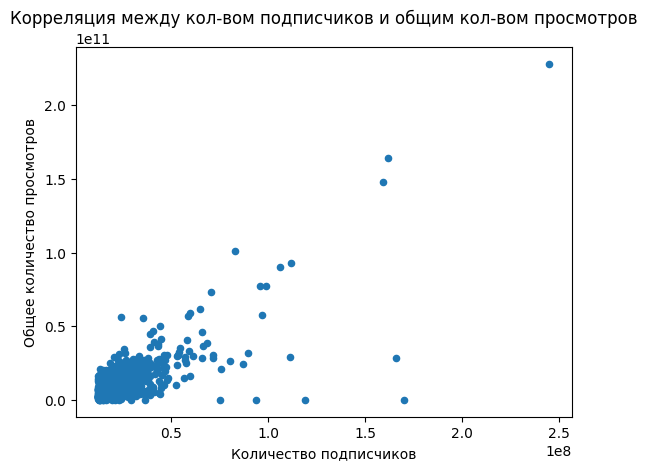

In [123]:
# Рассмотрим корреляцию между кол-вом подписчиков и общим кол-вом просмотров

plt.figure()
x_subs = data['Количество подписчиков']
y_views = data['Общее количество просмотров']
pd.DataFrame(np.array([x_subs, y_views]).T).plot.scatter(0, 1)
plt.title('Корреляция между кол-вом подписчиков и общим кол-вом просмотров')
plt.xlabel('Количество подписчиков')
plt.ylabel('Общее количество просмотров')
plt.show()

In [124]:
# Найдем страну, в которой наибольшее кол-во каналов

data_country = data.groupby('Страна')['Название YouTube-канала'].count() \
                   .sort_values(ascending=False)[:10]
data_country

Страна
United States     313
India             168
Brazil             62
United Kingdom     43
Mexico             33
Indonesia          28
Spain              22
Thailand           18
South Korea        17
Russia             16
Name: Название YouTube-канала, dtype: int64

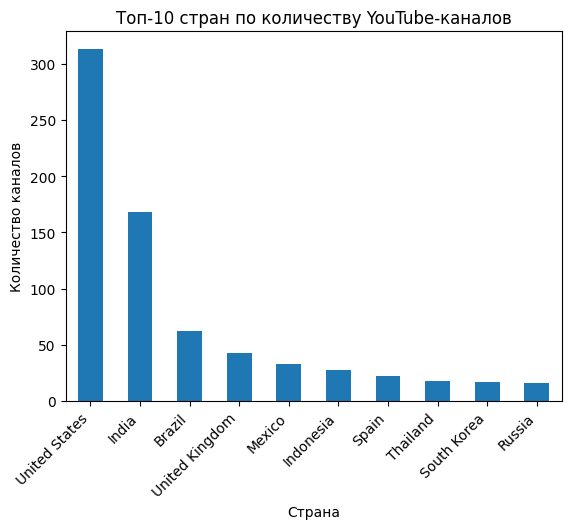

In [125]:
plt.figure()

data_country.plot.bar(x=data_country.index, y=data_country.values)

plt.title('Топ-10 стран по количеству YouTube-каналов')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество каналов')
plt.show()

Как мы видим, США с болльшим отрывом от всех. Давайте проанализируем конретно каналы в США


In [126]:
data_usa = data[data['Страна'] == 'United States'].copy()
data_usa.head(5)

,Название YouTube-канала,Количество подписчиков,Общее количество просмотров,Категория канала,Общее количество загруженных видеороликов,Страна,Тип канала,Наименьший предполагаемый месячный доход,Наибольший предполагаемый месячный доход,Наименьший предполагаемый годовой доход,Наибольший предполагаемый годовой доход,Год создания канала,"Месяц, когда был создан канал",День создания канала,Процент населения в стране с высшим образованием,Общая численность населения страны,Уровень безработицы в стране
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,Games,0.0,0.05,0.04,0.58,2006.0,Mar,5.0,88.2,328239523.0,14.7
2,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,337000.0,5400000.00,4000000.00,64700000.00,2012.0,Feb,20.0,88.2,328239523.0,14.7
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,493800.0,7900000.00,5900000.00,94800000.00,2006.0,Sep,1.0,88.2,328239523.0,14.7
6,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,1111,United States,Entertainment,182900.0,2900000.00,2200000.00,35100000.00,2015.0,May,12.0,88.2,328239523.0,14.7
9,Vlad and Niki,98900000,7.718017e+10,Entertainment,574,United States,Entertainment,145100.0,2300000.00,1700000.00,27900000.00,2018.0,Apr,23.0,88.2,328239523.0,14.7


OFFTOP: Решил посмотреть канал "YouTube Movies". Название канала и его тип ("Film & Animation") совпадают, но как этот канал попал в категорию "Games"?) Также странно, что нет информации о доходах и общем кол-ве просмотров. Набрал в поиске YouTube'а и не нашел... Точнее нашел, но он полностью пуст (даже и через VPN)! Пожалуй, удалю этот канал из выборки.

In [127]:
# Удалим ненужные столбцы
data_usa.drop(data_usa.index[0], inplace=True)
data_usa.drop(['Страна'], axis=1, inplace=True)
data_usa.head(5)

,Название YouTube-канала,Количество подписчиков,Общее количество просмотров,Категория канала,Общее количество загруженных видеороликов,Тип канала,Наименьший предполагаемый месячный доход,Наибольший предполагаемый месячный доход,Наименьший предполагаемый годовой доход,Наибольший предполагаемый годовой доход,Год создания канала,"Месяц, когда был создан канал",День создания канала,Процент населения в стране с высшим образованием,Общая численность населения страны,Уровень безработицы в стране
2,MrBeast,166000000,2.836884e+10,Entertainment,741,Entertainment,337000.0,5400000.0,4000000.0,64700000.0,2012.0,Feb,20.0,88.2,328239523.0,14.7
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,Education,493800.0,7900000.0,5900000.0,94800000.0,2006.0,Sep,1.0,88.2,328239523.0,14.7
6,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,1111,Entertainment,182900.0,2900000.0,2200000.0,35100000.0,2015.0,May,12.0,88.2,328239523.0,14.7
9,Vlad and Niki,98900000,7.718017e+10,Entertainment,574,Entertainment,145100.0,2300000.0,1700000.0,27900000.0,2018.0,Apr,23.0,88.2,328239523.0,14.7
11,WWE,96000000,7.742847e+10,Sports,70127,Sports,178700.0,2900000.0,2100000.0,34300000.0,2007.0,May,11.0,88.2,328239523.0,14.7


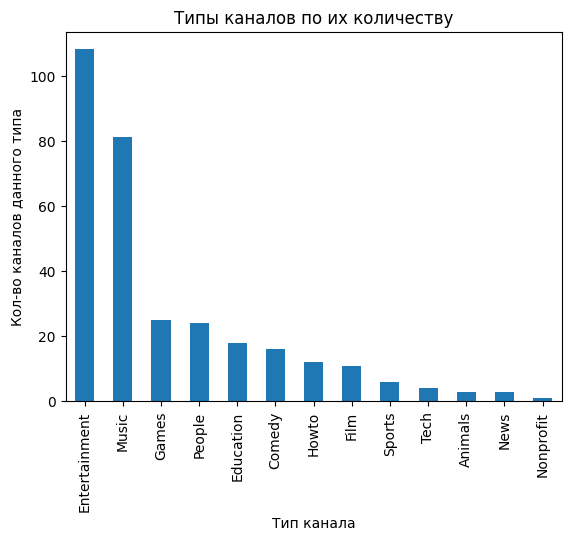

In [128]:
# Посмотрим самые популярные типы каналов
plt.figure()
data_usa['Тип канала'].value_counts().plot.bar()
plt.title('Типы каналов по их количеству')
plt.xlabel('Тип канала')
plt.ylabel('Кол-во каналов данного типа')
plt.show()

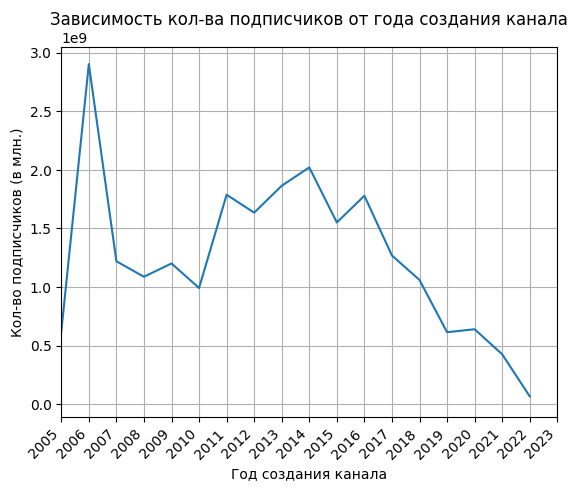

In [129]:
# Зависимость кол-ва подписчиков и общ. кол-ва просмотров от года создания канала
plt.figure()
data.groupby('Год создания канала')['Количество подписчиков'].sum().plot()
plt.ylabel('Кол-во подписчиков (в млн.)')
plt.title('Зависимость кол-ва подписчиков от года создания канала')
plt.xlim(2005, 2023)
plt.locator_params(axis='x', nbins= 18)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

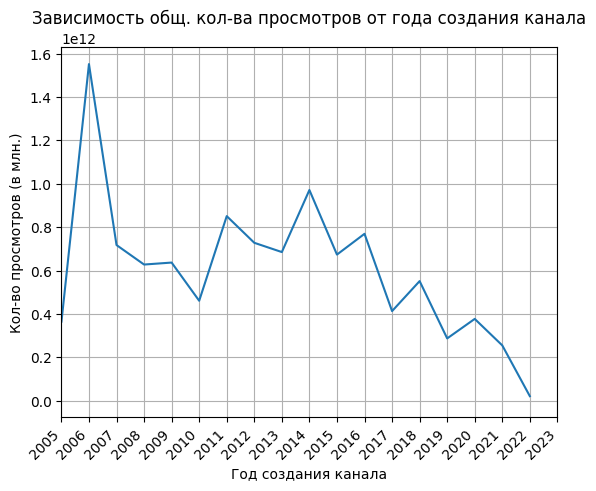

In [130]:
# Зависимость общ. кол-ва просмотров от года создания канала
plt.figure()
data.groupby('Год создания канала')['Общее количество просмотров'].sum().plot()
plt.ylabel('Кол-во просмотров (в млн.)')
plt.title('Зависимость общ. кол-ва просмотров от года создания канала')
plt.xlim(2005, 2023)
plt.locator_params(axis='x', nbins= 18)
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

**Общий вывод.**

*   Самый популярный канал - “T-Series” (С большим отрывом от остальных)
*   Топ-3 самых популярных категории: Entertainment, Music и People & Blogs. Причем Entertainment и Music занимают почти половину всех категорий
*   Самая популярная страна по количеству YouTube-каналов - США (с большим отрывом от остальных. От второго места в 2 раза!)
*   Каналы, созданные в 2006г., имеют больше всего подписчиков и просмотров. Следующий пик приходится на 2011-2016 года (2014 самый пик)

